### Code to generate the maze

In [0]:
# Import libraries

import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import math
import queue as Q
from matplotlib.colors import ListedColormap
import time
import pprint as pp
import pandas as pd

In [0]:
# Function to generate maze of given dimension. It takes 'p' as the probability of a particular cell being blocked.

def generate_maze(dim = 150, p = 0.2):
    
    rows = dim
    cols = dim
    mat = np.ones((dim,dim))               # a maze with all free cells is generated
    
    for i in range(rows):
        for j in range(cols):
            if( rand.uniform(0,1) < p ):     # if random number is greater than p, an obstacle is added to the cell (i, j)
                mat[i][j] = 0
    
    mat[0][0] = 1              # start needs to be unblocked
    mat[dim-1][dim-1] = 1      # goal needs to be unblocked
    
    return mat 

In [0]:
# Function to visualize a maze

def visualise_maze(maze):
  plt.figure(figsize = (15,15))
  ax = sns.heatmap(maze, linewidths=.5, square = True, cbar=False, xticklabels=False, yticklabels=False)
  plt.show()

In [0]:
# Function to visualize the obtained path

def display_path(maze_temp, prev_list, start, goal):
  
    prev_node = goal
    path = [prev_node]
    maze_temp[prev_node] = 25        #----> green color to the goal
    
    if bool(prev_list):
      while(prev_list[prev_node] != start):
        current_node = prev_node
        prev_node = prev_list[(current_node)]
        path.append(prev_node)
        maze_temp[prev_node] = 50    #----> crimson color to the path
        
      path.append(prev_list[prev_node])
      path.reverse()
      maze_temp[prev_list[prev_node]] = 25    #----> green color to the start
      
      path_length = str(len(path))
      
      plt.figure(figsize = (15,15))
      sns.heatmap(maze_temp, cmap=ListedColormap(['black', 'green', 'crimson', 'papayawhip']), linewidths=.5,  square = True, cbar=False, xticklabels=False, yticklabels=False)
      plt.show()
      
      return path_length

In [0]:
# Function to obtain the length of a path

def path_length(goal, prev_list, start):
    
    prev_node = goal
    path = [prev_node]
    path_len = 0
    
    if bool(prev_list):
        while(prev_node in prev_list.keys() and prev_list[prev_node] != start):
            current_node = prev_node
            prev_node = prev_list[(current_node)]
            path.append(prev_node)
        
        path.append(prev_list[prev_node])
        path.reverse()

        path_len = len(path)
    
    return path_len 

### Search Algorithms:

In [0]:
# Function to check whether a given child cell is fit for exploration (adding to the fringe). Returns boolean indicating validity.

def check_child_validity(maze,vertex,visited):
    
    dim = maze.shape[0] 
    
    # If dimensions are in the range of the matrix dimensions (if cell is going out of bounds)
    if vertex[0]==-1 or vertex[1]==-1 or vertex[0]==dim or vertex[1]==dim:
        return False
      
    # If cell is closed or already visited
    elif maze[vertex[0],vertex[1]]==0 or vertex in visited:
        return False
    
    # Valid
    else:
        return True  

In [0]:
# Function to generate neighbours of a given cell

def create_child_nodes(maze,visited,x,y):
  child_list = []
  
  node1 = (x+1,y)   # Right neighbor
  if(check_child_validity(maze,node1, visited)):
    child_list.append(node1)
                
  node2 = (x,y+1)   # Bottom neighbor
  if(check_child_validity(maze,node2, visited)):
    child_list.append(node2)

  node3 = (x-1,y)   # Left neighbor
  if(check_child_validity(maze,node3, visited)):
    child_list.append(node3)

  node4 = (x,y-1)   # Top neighbor
  if(check_child_validity(maze,node4, visited)):
    child_list.append(node4)
  
  return child_list

## BFS

In [0]:
# Function to implement Breadth First Search

def BFS(maze,start,goal):
  
    fringe = []
    fringe.append(start)
    visited = []    
    prev_list = {}  # To store pointers from children to their parents. It is useful for backtracking the path
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    while(fringe):
        vertex = fringe.pop(0)
        max_fringe_size = max(max_fringe_size, len(fringe))
        count_of_nodes+=1

        if vertex == goal:   # to check if the goal state is found
            return 1, prev_list, count_of_nodes, max_fringe_size, visited
            
        i = vertex[0]
        j = vertex[1]
            
        # Generating and adding children nodes in the fringe
        children = create_child_nodes(maze,visited,i,j)
        if children:
            for c in children:
                prev_list[c] = vertex
                fringe.append(c)
                visited.append(c)

    return 0, prev_list, count_of_nodes, max_fringe_size, visited  # No path found

## DFS

In [0]:
# Function to implement Breadth First Search

def DFS(maze, start, goal):
    
    fringe = [start]
    visited = [start]
    prev_list = {}  # To store pointers from children to their parents. It is useful for backtracking the path
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    while fringe:
        (i, j) = fringe.pop()
        count_of_nodes+=1
        max_fringe_size = max( max_fringe_size, len(fringe) )
        
        if (i, j) == goal:    # to check if the goal state is found
            return 1, prev_list, count_of_nodes, max_fringe_size, visited
           
        # Generating and adding child nodes in fringe 
        children = create_child_nodes(maze,visited,i,j)
        if children:
            for c in children:
                prev_list[c] = (i,j)
                fringe.append(c)
                visited.append(c)

    return 0, prev_list, count_of_nodes, max_fringe_size, visited  # No path found

##Improved DFS

In [0]:
# Function to prioritize children based on the distance to the goal. This improves DFS search

def prioritize_children(maze, goal, visited, x, y):
  
    children = []
    node = []
    h = []
    
    node.append((x+1, y))
    h.append((goal - node[0][0]) + (goal - node[0][1]))
    
    node.append((x, y+1))
    h.append((goal - node[1][0]) + (goal - node[1][1]))
    
    node.append((x-1, y))
    h.append((goal - node[2][0]) + (goal - node[2][1]))
    
    node.append((x, y-1))
    h.append((goal - node[3][0]) + (goal - node[3][1]))
    
    for i in range(4):
        ind = h.index(min(h))
        h.pop(ind)
        current_child = node.pop(ind)
        if(check_child_validity(maze,current_child,visited)):
            children.append(current_child)
    
    children.reverse()
    return children

In [0]:
# Improved function of Depth-First Search

def improved_DFS(maze, start, goal):
  
    fringe = [start]
    visited = [start]
    prev_list = {}    # To store pointers from children to their parents. It is useful for backtracking the path
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    while fringe:
        (i, j) = fringe.pop()
        count_of_nodes+=1
        max_fringe_size = max( max_fringe_size, len(fringe) )
        
        if (i, j) == goal:    # to check if the goal state is found
            return 1, prev_list, count_of_nodes, max_fringe_size
           
        # Generating and adding child nodes in fringe 
        children = prioritize_children(maze,goal[0]-1,visited,i,j)    #----> Improvement
        if children:
          for c in children:
            prev_list[c] = (i,j)
            fringe.append(c)
            visited.append(c)
     
    return 0, prev_list, count_of_nodes, max_fringe_size  # No path found

## A*

In [0]:
# Function to assign heuristics to nodes

def A_star_heuristic(maze, h, goal, heuristic):    
    
    dim = maze.shape[0]
    
    for i in range(dim):
        for j in range(dim): 
            if(heuristic == "manhattan"):
                h[i][j] = ( abs(goal[0]-i) + abs(goal[1]-j) )

            if(heuristic == "euclidean"):
                h[i][j] = math.sqrt( (goal[0] - i)**2 + (goal[1]-j)**2 ) 
    

In [0]:
# Function for A* search

def A_star(maze, start, goal, heuristic):
    
    dim = maze.shape[0]
    
    h = np.zeros((dim, dim))
    g = np.zeros((dim,dim))
    f = np.zeros((dim,dim))
    
    g[start] = 0
    A_star_heuristic( maze, h, goal, heuristic)
    f = g + h
    
    visited = []
    prev_list = {}  # To store pointers from children to their parents. It is useful for backtracking the path
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    fringe = Q.PriorityQueue()    # Priority queue to prioritize nodes based on cost and heuristics
    fringe.put((f[start], start))
    
    while not (fringe.empty()):
        
        
        vertex = fringe.get()[1]
        count_of_nodes+=1
        max_fringe_size = max( max_fringe_size, fringe.qsize() )
        visited.append(vertex)
        
        if vertex == goal:    # to check if the goal state is found
            return 1, prev_list, count_of_nodes, max_fringe_size, visited
        
        i = vertex[0]
        j = vertex[1] 

        # Generating and adding child nodes in fringe 
        child = create_child_nodes(maze,visited,i,j)
        if child:
            for c in child:
                prev_list[c] = vertex
                visited.append(c)
                g[c] = g[vertex] + 1
                f[c] = g[c] + h[c]
                fringe.put((f[c], c))
    
    return 0, prev_list, count_of_nodes, max_fringe_size, visited  # No path found

### Bi-directional BFS:

In [0]:
# Function to exapand children for Bi-directional BFS

def biBFS(maze,visited,fringe,prev_list,count_of_nodes,max_fringe_size):
  
  vertex = fringe.pop(0)
  count_of_nodes+=1
  max_fringe_size = max( max_fringe_size, len(fringe))
            
  i = vertex[0]
  j = vertex[1]
            
  # Generating and adding child nodes in fringe 
  
  child = create_child_nodes(maze,visited,i,j)
  if child:
    for c in child:
      prev_list[c] = vertex
      fringe.append(c)
      visited.append(c) 
    
  return visited, fringe, prev_list, count_of_nodes, max_fringe_size

In [0]:
# Function to check if an intersection point is found

def isIntersecting(intersectionNode, s_fringe,g_fringe):
    if intersectionNode == (-1,-1):
      for c in s_fringe:
          if(c in g_fringe):
              return c
      return (-1,-1)
    
    else:
      return intersectionNode  

In [0]:
def BiDirectionalBFS(maze, start, goal):
  
    count_of_nodes = 0
    max_fringe_size = 0
  
    s_visited = []
    g_visited = []
    s_visited.append(start)
    g_visited.append(goal)
  
    s_prev = {}    #To store pointers from children to their parents. It is useful for backtracking the path from start to the intersection point.
    g_prev = {}    #To store pointers from children to their parents. It is useful for backtracking the path from goal to the intersection point.
  
    s_fringe = [start]
    g_fringe = [goal]
  
  
    intersectionNode = (-1,-1)
  
    while(s_fringe and g_fringe):
    
        s_visited, s_fringe, s_prev, count_of_nodes, max_fringe_size = biBFS(maze,s_visited,s_fringe,s_prev,count_of_nodes,max_fringe_size)
        intersectionNode = isIntersecting(intersectionNode, s_fringe, g_fringe)
        g_visited, g_fringe, g_prev,count_of_nodes, max_fringe_size = biBFS(maze,g_visited,g_fringe,g_prev,count_of_nodes,max_fringe_size)
        intersectionNode = isIntersecting(intersectionNode, s_fringe, g_fringe)
      
        if intersectionNode!=(-1,-1):
            print("Intersection at cell:")
            print(intersectionNode)
            return 1, intersectionNode, s_prev, g_prev, count_of_nodes, max_fringe_size
      
    return 0, intersectionNode, s_prev, g_prev, count_of_nodes, max_fringe_size


## Funtion to generate and solve the maze

In [0]:
def solve_maze():
  
    path_length = 0
    
    ## LIST of fators ##
    algo_list = [ "BFS", "DFS", "IDFS", "A_Manhattan", "A_Euclidean", "BD_BFS"]
    factor_list = ["path_length", "time", "nodes_explored", "max_fringe_size"] 
    df = pd.DataFrame(columns= factor_list, index=algo_list)                     # data frame to store performance parameters for each algorithm

    
  
    print("---------Maze Generated---------")                     # STEP - 1: Generate maze to be solved with dim,p    
    maze = generate_maze(dim, p)                                
    maze_temp = maze*100                       # maze_temp is used for visualisation 
    visualise_maze(maze_temp)    

    #  STEP - 2: Solve the maze  #(finding path from start to goal) generated for differenct search algorithms
    
    ##  BFS  ##
    print("---------BFS---------")
    
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = BFS(maze, start, goal)
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

        
    df.loc["BFS"]["time"] = current_time
    df.loc["BFS"]["nodes_explored"] = count_of_nodes
    df.loc["BFS"]["path_length"] = path_length
    df.loc["BFS"]["max_fringe_size"] = max_fringe_size
    

    ## DFS ##
    print("\n---------DFS---------")
    
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited  = DFS(maze, start, goal)
    current_time = round(time.time() - start_time, 4)
   
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

    df.loc["DFS"]["time"] = current_time
    df.loc["DFS"]["nodes_explored"] = count_of_nodes
    df.loc["DFS"]["path_length"] = path_length
    df.loc["DFS"]["max_fringe_size"] = max_fringe_size

    
    ## Improved DFS ##
    print("\n---------Improved DFS---------")

    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size  = improved_DFS(maze, start, goal)
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")
    
    df.loc["IDFS"]["time"] = current_time
    df.loc["IDFS"]["nodes_explored"] = count_of_nodes
    df.loc["IDFS"]["path_length"] = path_length
    df.loc["IDFS"]["max_fringe_size"] = max_fringe_size

    
    ##  A* - MANHATTAN  ##
    
    print(" \n ---------A* -Manhattan---------")
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(maze, start, goal, "manhattan")
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

    df.loc["A_Manhattan"]["time"] = current_time
    df.loc["A_Manhattan"]["nodes_explored"] = count_of_nodes
    df.loc["A_Manhattan"]["path_length"] = path_length
    df.loc["A_Manhattan"]["max_fringe_size"] = max_fringe_size
    
  
  ## A* - Eucledian ##
  
    print("\n ---------A* Eucledian---------")
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(maze, start, goal, "eucledian")
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

    df.loc["A_Euclidean"]["time"] = current_time
    df.loc["A_Euclidean"]["nodes_explored"] = count_of_nodes
    df.loc["A_Euclidean"]["path_length"] = path_length
    df.loc["A_Euclidean"]["max_fringe_size"] = max_fringe_size
    
    
    ## Bi-Directional BFS ##
    
    print("\n ---------BD-BFS---------")
    start_time = time.time()
    is_goal_reached, intersectionNode, s_prev, g_prev, count_of_nodes, max_fringe_size = BiDirectionalBFS(maze, (0,0),(dim-1,dim-1))
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
    else:
        print("No path found")

    
    if intersectionNode!=(-1,-1):
      maze_temp_1 = maze*100
      path_1 = display_path(maze_temp_1, s_prev, (0,0),intersectionNode)
      maze_temp_2 = maze*100
      path_2 = display_path(maze_temp_2, g_prev, (dim-1,dim-1),intersectionNode)
      path_length = int(path_1) + int(path_2) -1
    
    df.loc["BD_BFS"]["time"] = current_time
    df.loc["BD_BFS"]["nodes_explored"] = count_of_nodes 
    df.loc["BD_BFS"]["path_length"] = path_length 
    df.loc["BD_BFS"]["max_fringe_size"] = max_fringe_size 
    
    
    print(df)


In [0]:
dim = 150
p = 0.2
start = (0,0)
goal = (dim-1, dim-1)

---------Maze Generated---------


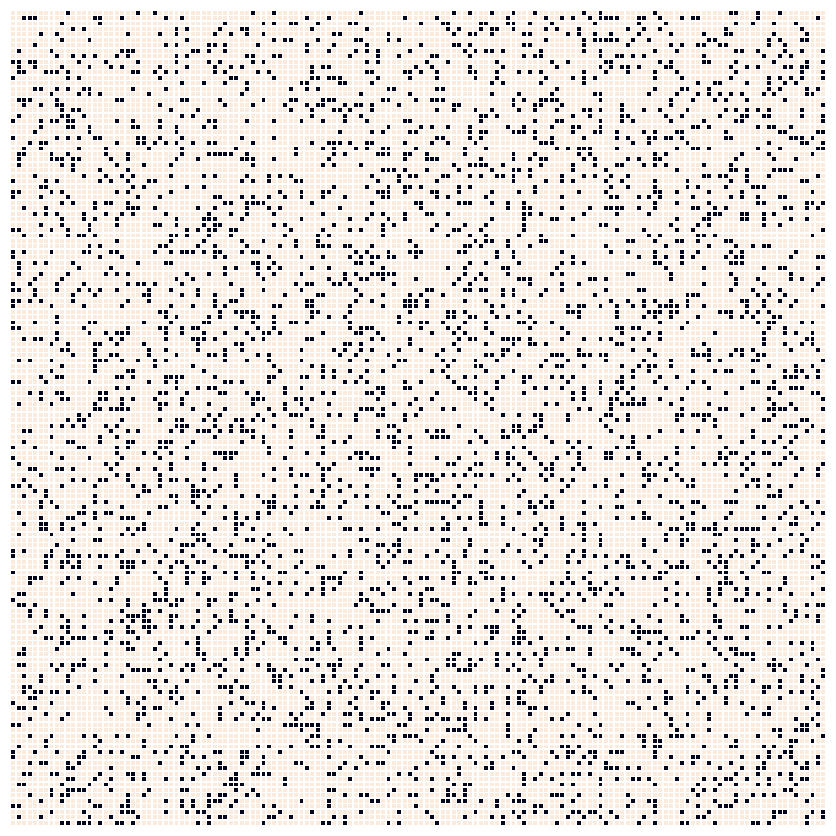

---------BFS---------


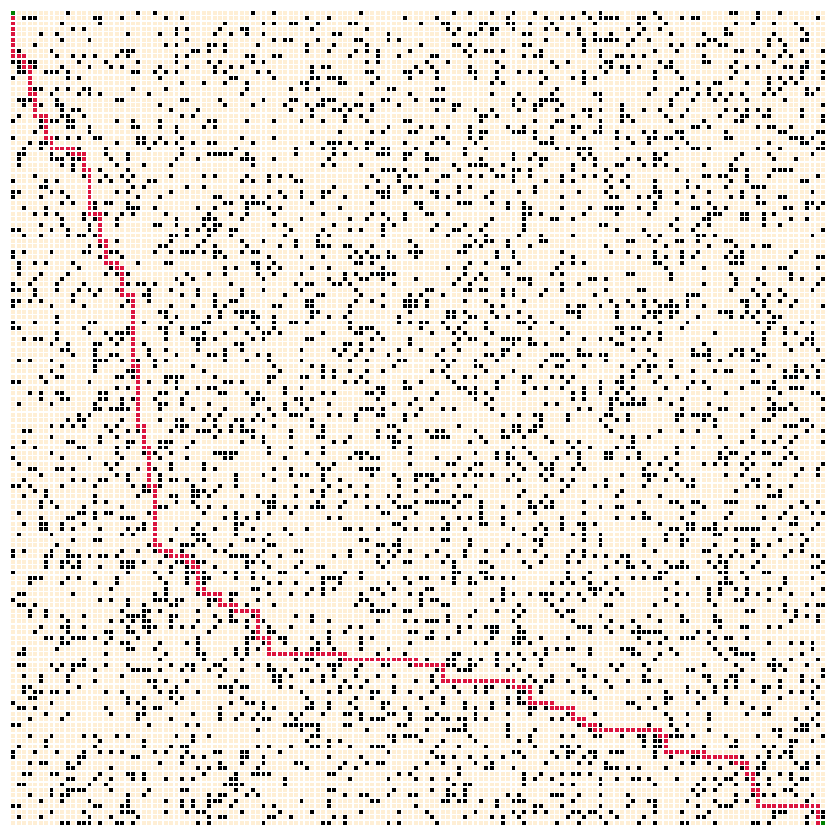


---------DFS---------
Goal Reached


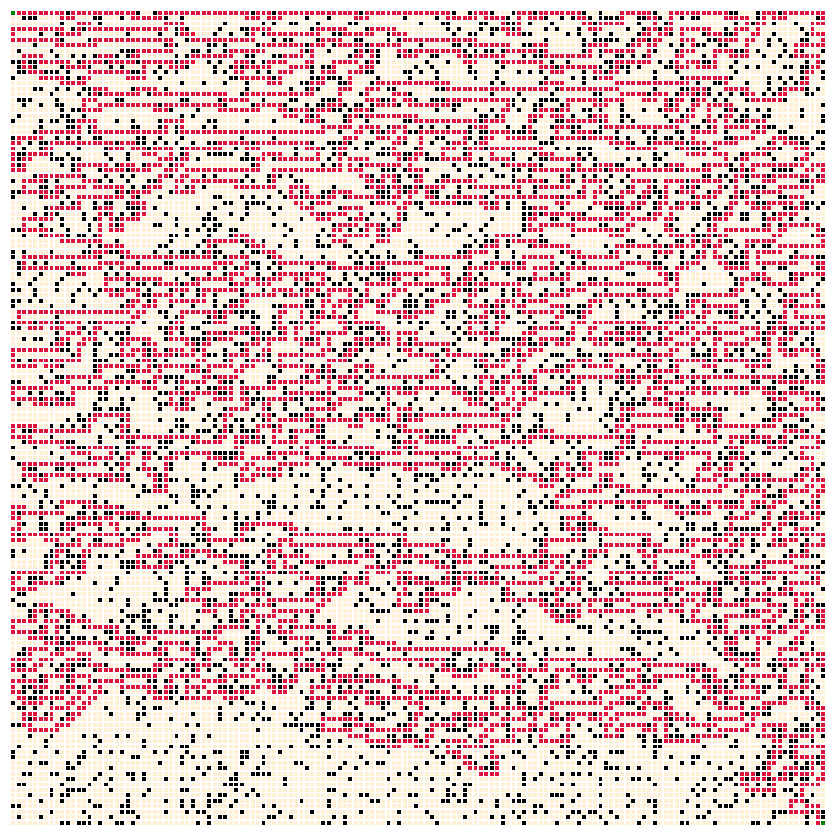


---------Improved DFS---------
Goal Reached


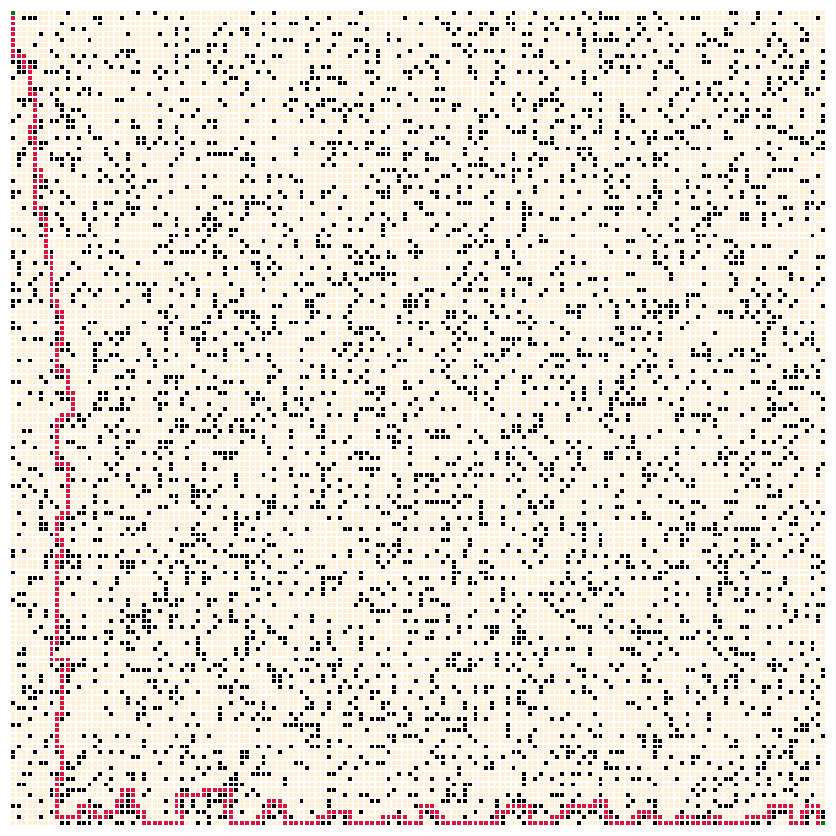

 
 ---------A* -Manhattan---------
Goal Reached


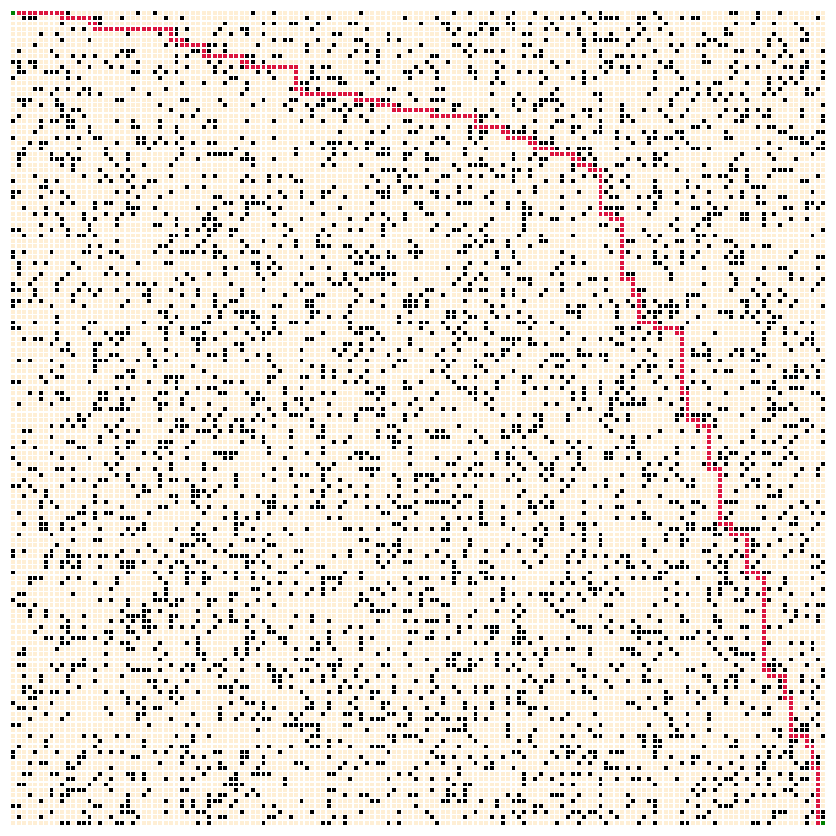


 ---------A* Eucledian---------
Goal Reached


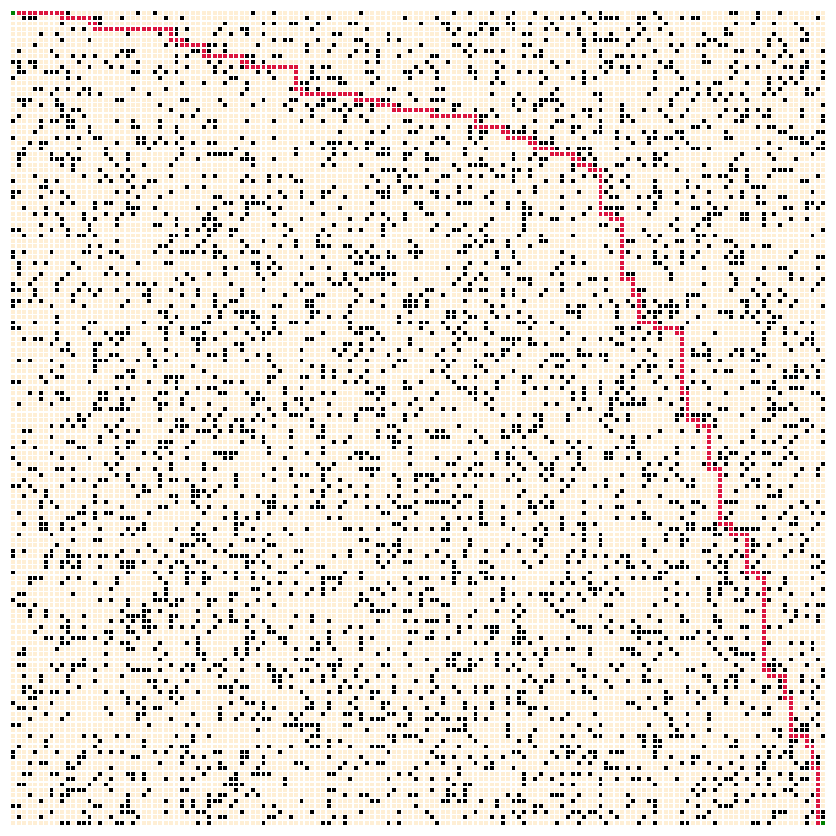


 ---------BD-BFS---------
Intersection at cell:
(99, 50)
Goal Reached


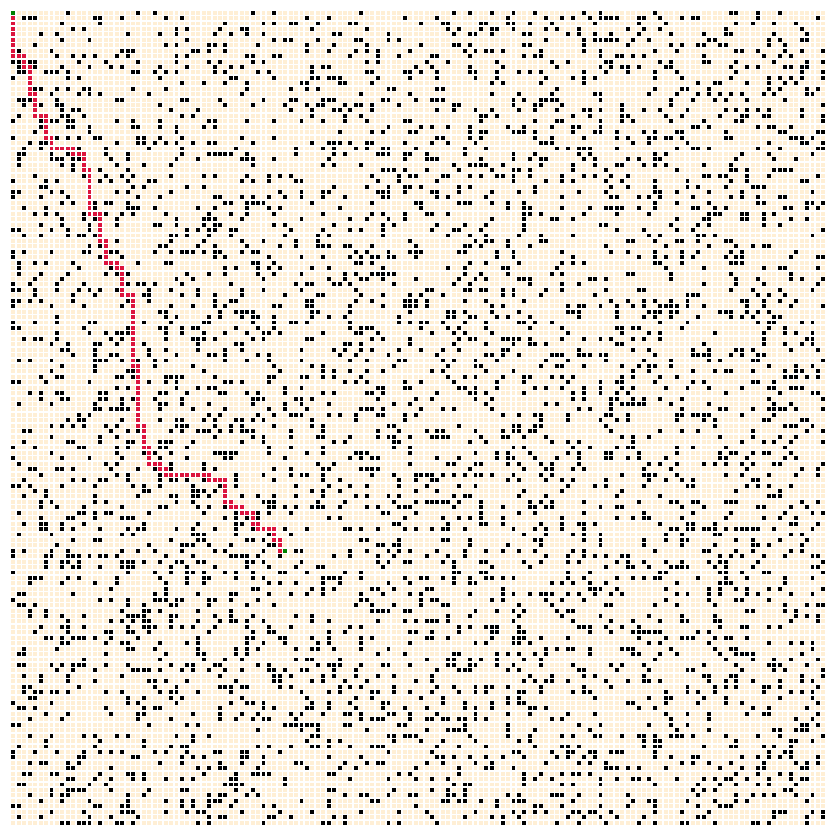

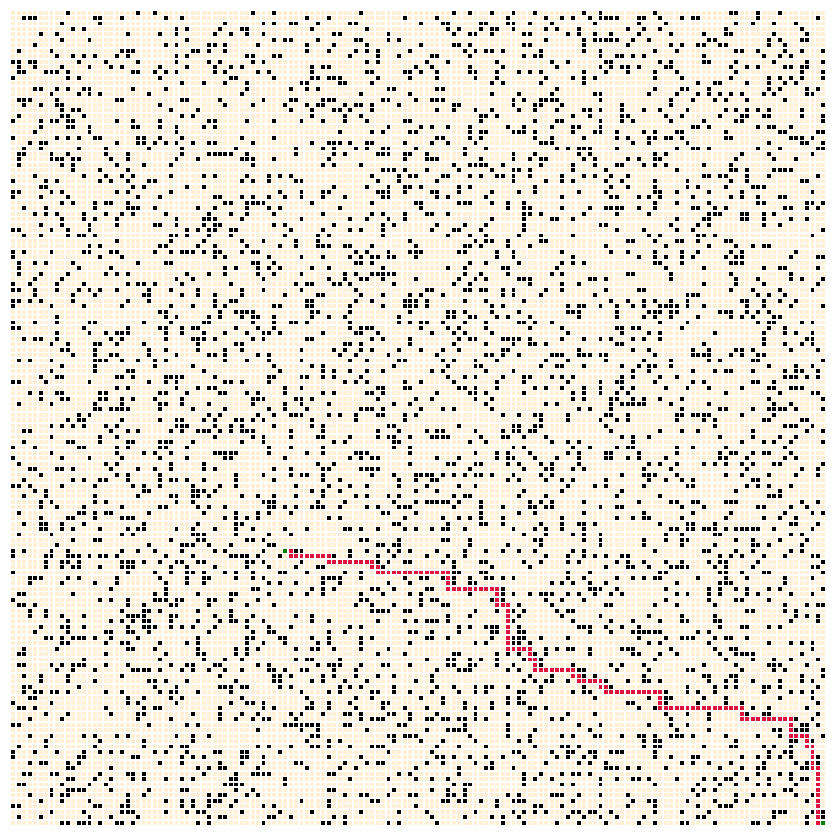

            path_length     time nodes_explored max_fringe_size
BFS                 299   11.083          18019             137
DFS                6737   6.6063          11213            5250
IDFS                409   0.0736           1175             360
A_Manhattan         299   9.7969          11619             913
A_Euclidean         299  22.8512          18019             143
BD_BFS              299   7.4389          16758             124


In [0]:
solve_maze()